In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

% matplotlib inline

plt.rcParams['figure.figsize'] = (16.0, 8.0)
pd.set_option('display.precision',9)

In [2]:
bw = pd.read_csv('./bw_data.csv')
bw.head()

,id,ts,bandwidth
0,4,1518575533,56623520
1,5,1518575240,95733424
2,6,1518572471,52946496
3,7,1518576880,61887376
4,8,1518579103,48975776


In [3]:
bw.drop(columns=['id'], inplace=True)

In [4]:
bw.dtypes

ts           object
bandwidth    object
dtype: object

In [5]:
bw.isnull().sum()

ts           0
bandwidth    0
dtype: int64

In [6]:
bw.shape

(918792, 2)

In [7]:
bw = bw[bw.loc[:, 'ts'] != 'ts']
bw.shape
## 19 rows has invalid values. Contains: word "ts" instead of timestamps and "bandwidth" instead of bandwidth value
## remove it

(918773, 2)

In [8]:
bw.loc[:, 'bandwidth'] = pd.to_numeric(bw.loc[:, 'bandwidth'], errors='coerce')

In [9]:
bw.shape

(918773, 2)

In [10]:
bw.dtypes

ts           object
bandwidth     int64
dtype: object

In [11]:
bw.isnull().sum()


ts           0
bandwidth    0
dtype: int64

In [12]:
bw.head()

,ts,bandwidth
0,1518575533,56623520
1,1518575240,95733424
2,1518572471,52946496
3,1518576880,61887376
4,1518579103,48975776


In [13]:
bw['ts'] = pd.to_datetime(bw['ts'], unit='s', utc=True)

In [14]:
## Make ts as index
bw.set_index('ts', inplace=True)
bw.sort_index(inplace=True)

In [15]:
bw.describe()['bandwidth'].apply(lambda x: '{:.2f}'.format(x))

count        918773.00
mean       60279311.74
std        44893896.19
min             720.00
25%        34796952.00
50%        55564816.00
75%        77787408.00
max      2454161504.00
Name: bandwidth, dtype: object

In [16]:
bw.loc[:, 'bandwidth'].median()

55564816.0

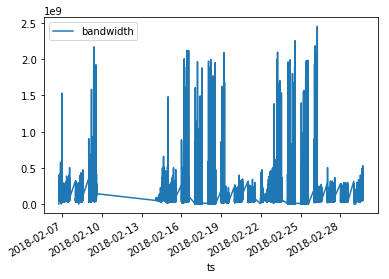

In [17]:
fig, ax = plt.subplots()
bw.plot(ax = ax);

In [ ]:
df2 = bw.groupby([bw.index.hour, bw.index.day, bw.index.month]).median()
df2.head()

In [ ]:
import seaborn
seaborn.set(style='ticks') 
np.random.seed(0)

fg = seaborn.factorplot(x=bw.index.day, y='bandwidth', hue=bw.index.hour, 
                        col=bw.index.month, data=bw, kind='bar')
fg.set_xlabels('')

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
df_hour = bw.groupby(bw.index.hour).median().plot(kind="bar", ax = ax)

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
df_day = bw.groupby(bw.index.day).median().plot(kind="bar", ax = ax)

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
df_hour_max = bw.groupby(bw.index.hour).max().plot(kind="bar", ax = ax)

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
df_day_max = bw.groupby(bw.index.day).max().plot(kind="bar", ax = ax)

In [ ]:
#Items per day
fig, ax = plt.subplots(figsize=(12, 5))
df2 = df.groupby([bw.index.hour, df.index.day, df.index.week])['Name'].meadian().unstack('Abuse/NFF').fillna(0)
bw.groupby(bw.index.day).max().plot(kind="bar", ax = ax)
bw.groupby( [bw.index.year, df.index.month, df.index.day] ).count()

In [ ]:
from pandas.plotting import autocorrelation_plot
fig,ax = plt.subplots(figsize=(12, 6))
autocorrelation_plot(bw.loc[:, 'bandwidth'], ax=ax)

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


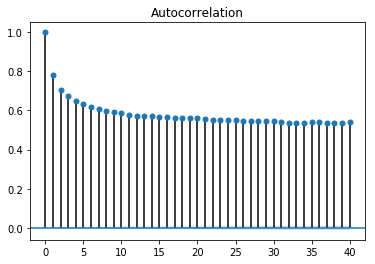

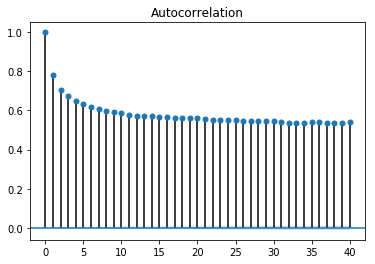

In [18]:
# Make an autocorrelation plot with statsmodels
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

fig,ax = plt.subplots()
plot_acf(bw.loc[:, 'bandwidth'], lags=40, ax=ax)

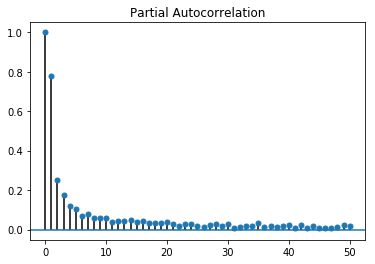

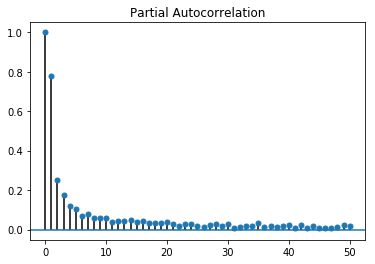

In [19]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

fig,ax = plt.subplots()
plot_pacf(bw.loc[:, 'bandwidth'], lags=50, ax=ax, method='ols')

In [20]:
lag_acf = acf(bw, nlags=60)
lag_pacf = pacf(bw, nlags=30, method='ols')

Text(0.5,1,'Autocorrelation Function')

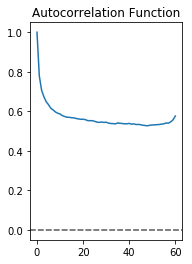

In [22]:
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(bw)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(bw)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

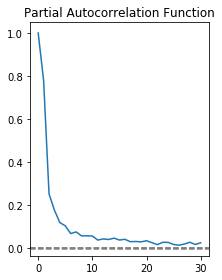

In [26]:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(bw)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(bw)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [27]:
five_seconds_mean = pd.rolling_mean(bw, window=30, min_periods=2, center=True)
sixty_seconds_mean = pd.rolling_mean(bw, window=60, min_periods=5, center=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=30,min_periods=2,center=True).mean()
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=60,min_periods=5,center=True).mean()
  


In [29]:
print(five_seconds_mean.mean())
print(sixty_seconds_mean.mean())

bandwidth    6.027945734e+07
dtype: float64
bandwidth    6.027937842e+07
dtype: float64


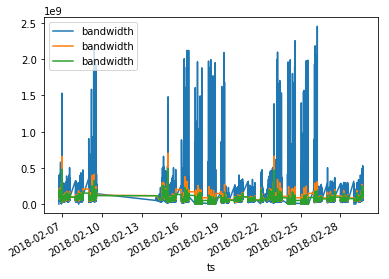

In [30]:
fig, ax = plt.subplots()
bw.plot(ax = ax);
five_seconds_mean.plot(ax=ax)
sixty_seconds_mean.plot(ax=ax);

In [ ]:
# Import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

In [ ]:
# Apply seasonal_decompose to the bus data and plot the result
import matplotlib.pylab as plt

decomposition = seasonal_decompose(bw.loc[:, 'bandwidth'], model='additive', freq=20000, two_sided=True)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(bw, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


In [ ]:
# Accuracy of the Model
# Training Test Split
# Strong seasonality but no trend.. how to model that

In [ ]:
# GOAL
# How to predict deviation from mean. 
# How to predict reachine to bandwith capacity.
# Any other suggection.
# How to model spikes (which is rare)

In [ ]:
moving_avg = pd.rolling_mean(bw,30)
plt.plot(bw)
plt.plot(moving_avg, color='red')

In [39]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=30)
    rolstd = pd.rolling_std(timeseries, window=30)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.iloc[:, 0].values, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=30,center=False).mean()
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=30,center=False).std()
  


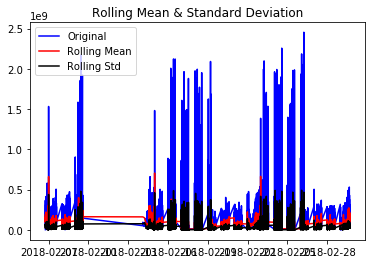

Results of Dickey-Fuller Test:


In [ ]:
test_stationarity(bw)

In [ ]:
fig,ax = plt.subplots(figsize=(12, 6))
expwighted_avg = pd.ewma(bw, halflife=30)
plt.plot(bw)
plt.plot(expwighted_avg, color='red')

In [38]:
#Fit ARIMA Model
#p – The lag value where the PACF chart crosses the upper confidence interval for the first time. 
#q – The lag value where the ACF chart crosses the upper confidence interval for the first time. 
p = 1
q = 1
d = 0
from statsmodels.tsa.arima_model import ARIMA
bw.index._set_freq(None)
print(bw.index.inferred_freq)

None


In [34]:
#AR Model
model = ARIMA(bw, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(bw)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-bw)**2))

TypeError: Cannot cast ufunc subtract output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

In [21]:
import pandas as pd
from fbprophet import Prophet


ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
m = Prophet()
m.fit(bw)
